In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

import customtkinter
import tkinter

In [2]:
# This show the graphs without scientific notation
pd.options.display.float_format = '{:20,.2f}'.format

# This reads in the file
houses = pd.read_csv('madrid_houses_clean.csv')

houses = houses.drop('Unnamed: 0', axis=1)
houses = houses.drop('id', axis=1)
houses = houses.drop('sq_mt_allotment', axis=1)
houses = houses.drop('is_renewal_needed', axis=1)
houses = houses.drop('has_lift', axis=1)
houses = houses.drop('is_exterior', axis=1)
houses = houses.drop('energy_certificate', axis=1)
houses = houses.drop('has_parking', axis=1)
houses = houses.drop('neighborhood', axis=1)
houses = houses.drop('district', axis=1)
houses = houses.drop('n_floors', axis=1)
houses = houses.drop('floor', axis=1)

# This scambles the data set so the test and train get random values 
houses = houses.sample(frac=1, replace=False, random_state=500)

houses

,sq_mt_built,n_rooms,n_bathrooms,buy_price,house_type
5967,73.00,3,1,154000,1
20019,242.00,4,4,2550000,1
15648,128.00,3,2,730000,1
1432,84.00,2,1,247000,5
141,133.00,2,1,264000,1
...,...,...,...,...,...
19389,176.00,2,2,1930000,1
3790,79.00,2,1,274000,1
8465,94.00,3,2,292000,1
12097,146.00,3,3,895000,4


In [3]:
# The column house_type has 5 different data types. 
# This filters out all rows that not houses. 
houses_np = houses.to_numpy()

count= len(houses_np)-1
for i in range(count, 0, -1):
    if houses_np[i, 4] != 2:
        houses_np = np.delete(houses_np, count, 0)
    count -= 1 

# Now that the house type has been sorted the house_type column will be dropped
houses = houses.drop('house_type', axis=1)
    
print('houses_np length: ',len(houses_np))

houses_np length:  1931


In [4]:
# This drops the house_type column because it is no longer needed. 
houses_np = np.delete(houses_np, slice(4,5), 1)
print(houses_np.shape)

(1931, 4)


<Axes: >

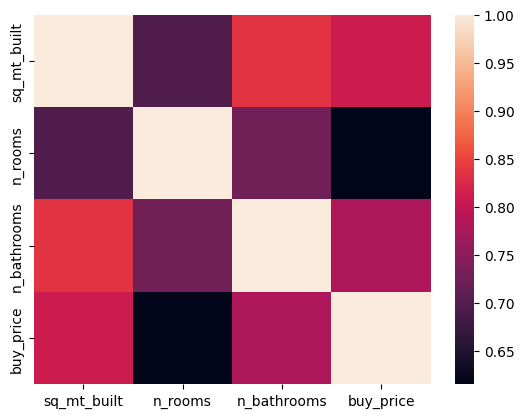

In [5]:
# This displays the correlation between variables
sns.heatmap(houses.corr())

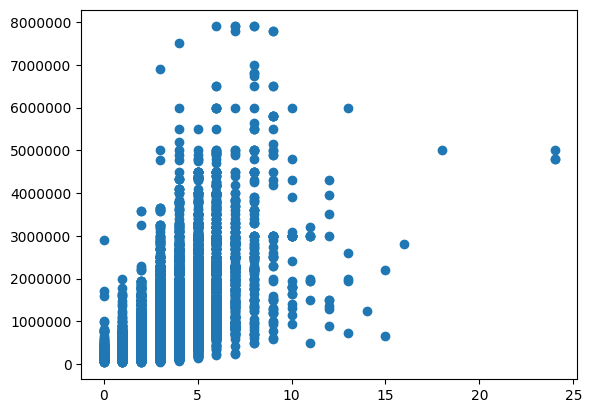

In [6]:
# This shows rooms (x axis) vs. the price of the home (y axis) 
# This scatter plot includes outliers
plt.scatter(houses.n_rooms, houses.buy_price)
plt.ticklabel_format(axis='both', style='plain')
plt.show()

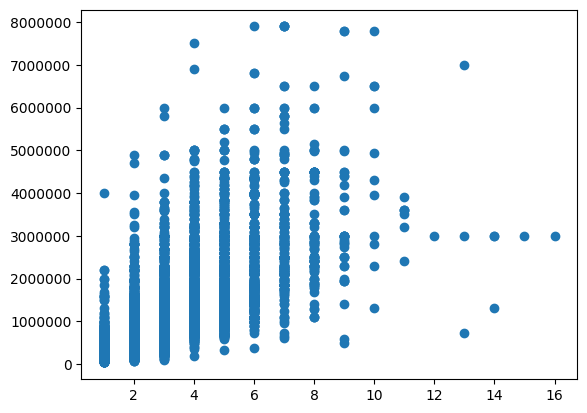

In [7]:
# This shows bathsrooms (x axis) vs. the price of the home (y axis)
# This scatter plot includes outliers
plt.scatter(houses.n_bathrooms, houses.buy_price)
plt.ticklabel_format(axis='both', style='plain')
plt.show()

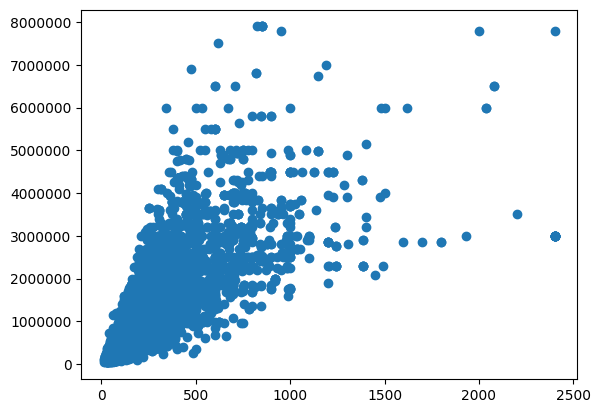

In [8]:
# This shows square meters (x axis) vs. the price of the home (y axis)
plt.scatter(houses.sq_mt_built, houses.buy_price)
plt.ticklabel_format(axis='both', style='plain')
plt.show()

In [9]:
#This function help find outliers in the data set 

def detect_outliers(data, thresh):
    outliers=[]
    threshold=thresh
    mean = np.mean(data)
    std =np.std(data)
    
    count = 0
    for i in data:
        z_score= (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(count)
            
        count += 1
    return outliers

In [10]:
print(houses_np.shape)

(1931, 4)


In [11]:
# This finds and removes the outliers for square meters
outlier_pt = detect_outliers(houses_np[:, 0], 2)

# this count accounts for the rows that have been removed    
count = len(outlier_pt)

for i in range(count, 0, -1):
    houses_np = np.delete(houses_np, outlier_pt[count-1], 0)
    count -= 1

In [12]:
# This finds and removes the outliers for the number of bedrooms
outlier_pt = detect_outliers(houses_np[:, 1],2)
count = len(outlier_pt)

for i in range(count, 0, -1):
    houses_np = np.delete(houses_np, outlier_pt[count-1], 0)
    count -= 1


In [13]:
# This finds outliers and removes the for the number of bathrooms
outlier_pt = detect_outliers(houses_np[:, 2], 3)
count = len(outlier_pt)

for i in range(count, 0, -1):
    houses_np = np.delete(houses_np, outlier_pt[count-1], 0)
    count -= 1

In [14]:
# This finds and removes the outliers for the price
outlier_pt = detect_outliers(houses_np[:, 3],2)
count = len(outlier_pt)

for i in range(count, 0, -1):
    houses_np = np.delete(houses_np, outlier_pt[count-1], 0)
    count -= 1

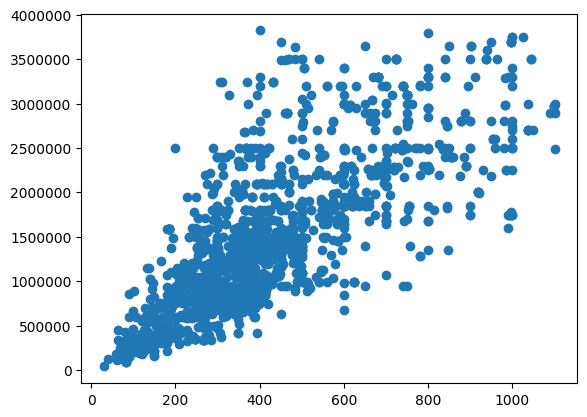

In [15]:
# This show square meters (x axis) vs. the price of the home (y axis)
# Scatter plot with outlier removed
plt.scatter(houses_np[:,0], houses_np[:, 3])
plt.ticklabel_format(axis='both', style='plain')
plt.show()

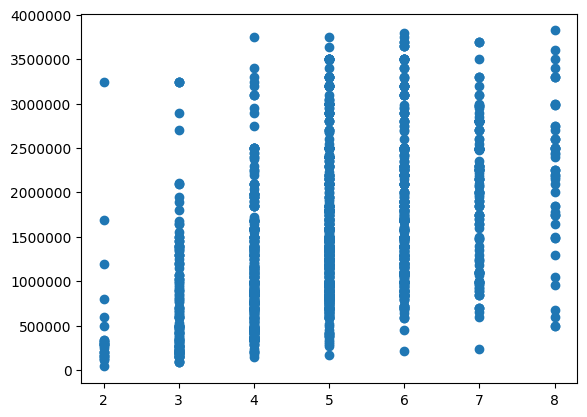

In [16]:
# This shows the number of rooms (x axis) vs. the price of the home (y axis)
plt.scatter(houses_np[:,1], houses_np[:, 3])
plt.ticklabel_format(axis='both', style='plain')
plt.show()

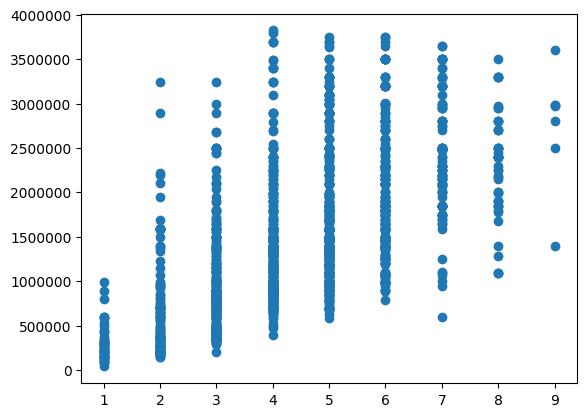

In [17]:
# This shows number of bathrooms (x axis) vs. the price of the home (y axis)
plt.scatter(houses_np[:,2], houses_np[:, 3])
plt.ticklabel_format(axis='both', style='plain')
plt.show()

In [18]:
# this determines the length of the train and test sets
length = len(houses_np)
test_len = int(length * .05)

# This assigns the train and test sets
x_train = houses_np[:-test_len, 0:3]
x_test = houses_np[-test_len:, 0:3]
y_train = houses_np[:-test_len, 3]
y_test = houses_np[-test_len:, 3]

In [19]:
# This just shows the size and shape of the data
print('houses shape', houses_np.shape)
print('x shape', x_train.shape)
print('y shape', y_train.shape)

houses shape (1700, 4)
x shape (1615, 3)
y shape (1615,)


In [20]:
# This is the implimentation of the Linear Regression model
regress = linear_model.LinearRegression()    
regress = regress.fit(x_train, y_train)
y_pred = regress.predict(x_test)

# This prints the results of the model
# The score represents the acurracy of the model
print(y_pred.shape)
print(regress.coef_) 
regress.score(x_test, y_test)

(85,)
[  2491.45384515 -12031.63331574  84418.97810801]


0.6841600469897083

In [21]:
print('x shape', x_test.shape)
print('y shape', y_test.shape)

x shape (85, 3)
y shape (85,)


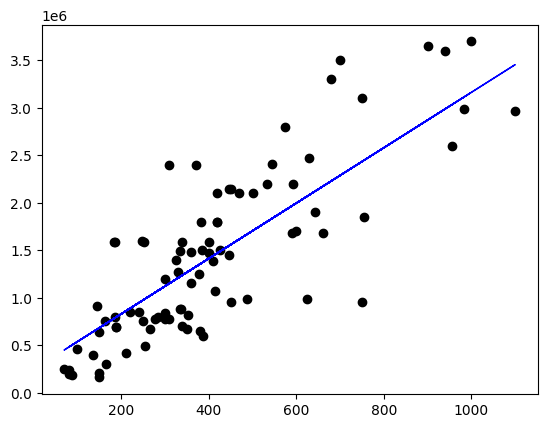

In [22]:
# Plot outputs
plt.scatter(x_test[:,0], y_test, color="black")
m, b = np.polyfit(x_test[:,0], y_pred, 1)
plt.plot(x_test[:,0], m*x_test[:,0]+b, color="blue", linewidth=1)

plt.show()

In [23]:
# This shows the difference between the listed price of the house and the prediction from the model 

predictions_df = pd.DataFrame({'price': houses_np[-test_len:, 3],
                                'beds': houses_np[-test_len:, 1],
                                'bath': houses_np[-test_len:, 2],
                                'area': houses_np[-test_len:, 0],
                                'Predictions':y_pred})
predictions_df.head()

,price,beds,bath,area,Predictions
0,"910,000.00",3.00,3.00,145.00,"686,824.63"
1,"2,150,000.00",7.00,7.00,447.00,"1,728,793.07"
2,"1,070,000.00",6.00,4.00,415.00,"1,407,841.24"
3,"300,000.00",3.00,1.00,166.00,"570,307.20"
4,"3,650,000.00",6.00,5.00,901.00,"2,703,106.79"


In [24]:
# This is the start of the GUI
customtkinter.set_appearance_mode("light")
customtkinter.set_default_color_theme("blue")

In [25]:
# This is for the login screen
def login_window(): 
    root_login = customtkinter.CTk()
    root_login.geometry(f"{1000}x{750}")

    #This is for the login logic
    def login():
        # This is the entry point for the prediction window
        if username.get()=='username1' and password.get()=='password1':
            print('Login Sucessful')
            root_login.destroy()
            new_window()
        else: 
            username.configure(text_color="red")
            password.configure(text_color="red")
            print('Wrong username or password')
            
    frame = customtkinter.CTkFrame(master = root_login)
    frame.pack(pady=20, padx=60, fill="both", expand=True) 
    label = customtkinter.CTkLabel(master=frame, text="Login", font=("Roboto", 24))
    label.pack(pady=12, padx=10)
    
    username= customtkinter.CTkEntry(master=frame, placeholder_text="username")
    username.pack(pady=12, padx=10)
    
    password = customtkinter.CTkEntry(master=frame, placeholder_text="password", show="*")
    password.pack(pady=12, padx=10)
    
    button = customtkinter.CTkButton(master=frame, text="Login", command = login)
    button.pack(pady=12, padx=10)
    
    root_login.mainloop()  

In [26]:
# This is the new window that will provide predictions
def new_window(): 
    root_new = customtkinter.CTk()
    root_new.geometry(f"{1000}X{750}")
    root_new.title("Prediction")

    # This is a gathers the user input and passes it to the prediction window.
    def get_prediction(sq_mt, room, bathroom, pred, pred_num):
        
        sq_mt.grid_forget()
        room.grid_forget()
        bathroom.grid_forget()
        pred.grid_forget()
        pred_num.grid_forget()
        
        # These try blocks validate the entries
        try: 
            if float(enter_square_meters.get()) >=50 and float(enter_square_meters.get()) <= 1000:
                enter_square_meters.configure(text_color="black")
                
            else:
                enter_square_meters.configure(text_color="red")
                sq_mt.grid(row=3, column=0, padx=(20, 0), pady=(20, 20))

                return
            
        except: 
            enter_square_meters.configure(text_color="red")
            sq_mt.grid(row=3, column=0, padx=(20, 0), pady=(20, 20))
            
            return

        try: 
            if float(enter_rooms.get()) >=1 and float(enter_rooms.get()) <= 8:
                enter_rooms.configure(text_color="black")
                
            else:
                enter_rooms.configure(text_color="red")
                room.grid(row=3, column=0, padx=(20, 0), pady=(20, 20))
                
                return
        except: 
            enter_rooms.configure(text_color="red")
            room.grid(row=3, column=0, padx=(20, 0), pady=(20, 20))
            
            return

        try: 
            if float(enter_baths.get()) >=1 and float(enter_baths.get()) <= 9: 
                enter_baths.configure(text_color="black")
                
            else:
                enter_baths.configure(text_color="red")
                bathroom.grid(row=3, column=0, padx=(20, 0), pady=(20, 20))
                
                return
        except: 
            enter_baths.configure(text_color="red")
            bathroom.grid(row=3, column=0, padx=(20, 0), pady=(20, 20))
            
            return


        data = [[enter_square_meters.get(), enter_rooms.get(), enter_baths.get()]]
                
        single_test_value = pd.DataFrame(data, columns=['area','rooms','bath'])
        single_test_value = single_test_value.to_numpy()
    
        single_pred = regress.predict(single_test_value)
        
        #This block prints the Predicion label with the prediction price
        pred.grid(row=3, column=0, padx=(20, 0), pady=(20, 20))

        pred_num = customtkinter.CTkLabel(master=frame_new, text='$ ' + str("{:10.2f}".format(single_pred[0])), font=("Roboto", 24))
        pred_num.grid(row=3, column=1, padx=(20, 0), pady=(20, 20))


   
    frame_new = customtkinter.CTkFrame(master=root_new) 
    frame_new.pack(pady=20, padx=60, fill="both", expand=True) 

    label_square_meters = customtkinter.CTkLabel(master=frame_new, text="Square Meters ", font=("Roboto", 24))
    label_square_meters.grid(row=0, column=0, padx=(20, 0), pady=(20, 20))

    enter_square_meters = customtkinter.CTkEntry(master=frame_new, placeholder_text="Enter values 50-1000")
    enter_square_meters.grid(row=0, column=1, padx=(20, 0), pady=(20, 20))

    label_rooms = customtkinter.CTkLabel(master=frame_new, text="Bedrooms", font=("Roboto", 24))
    label_rooms.grid(row=1, column=0, padx=(20, 0), pady=(20, 20))

    enter_rooms = customtkinter.CTkEntry(master=frame_new, placeholder_text="Enter values 1-8")
    enter_rooms.grid(row=1, column=1, padx=(20, 0), pady=(20, 20))

    label_baths = customtkinter.CTkLabel(master=frame_new, text="Bath Rooms", font=("Roboto", 24))
    label_baths.grid(row=2, column=0, padx=(20, 0), pady=(20, 20))

    enter_baths = customtkinter.CTkEntry(master=frame_new, placeholder_text="Enter values 1-9")
    enter_baths.grid(row=2, column=1, padx=(20, 0), pady=(20, 20))

    #Hidden labels that can be retrieved

    sq_mt_error_label = customtkinter.CTkLabel(master=frame_new, text='Please enter integers or float values for \'Square Meters\' between 50-1000.', font=("Roboto", 24))
    sq_mt_error_label.grid(row=3, column=0, padx=(20, 0), pady=(20, 20))
    sq_mt_error_label.grid_forget()

    room_error_label = customtkinter.CTkLabel(master=frame_new, text='Please enter integers or float values for \'Bedrooms\' between 1-8.', font=("Roboto", 24))
    room_error_label.grid(row=3, column=0, padx=(20, 0), pady=(20, 20))
    room_error_label.grid_forget()

    bathroom_error_label = customtkinter.CTkLabel(master=frame_new, text='Please enter integers or float values for \'Bathrooms\' between 1-9.', font=("Roboto", 24))
    bathroom_error_label.grid(row=3, column=0, padx=(20, 0), pady=(20, 20))
    bathroom_error_label.grid_forget()

    prediction_label = customtkinter.CTkLabel(master=frame_new, text='Prediction: ', font=("Roboto", 24))
    prediction_label.grid(row=3, column=0, padx=(20, 0), pady=(20, 20))
    prediction_label.grid_forget()

    pred_num_label = customtkinter.CTkLabel(master=frame_new, text= '', font=("Roboto", 24))
    pred_num_label.grid(row=3, column=1, padx=(20, 0), pady=(20, 20))
    pred_num_label.grid_forget()

    button = customtkinter.CTkButton(master=frame_new, text="Predict", command = lambda : get_prediction(sq_mt_error_label, room_error_label, bathroom_error_label, prediction_label, pred_num_label))
    button.grid(row=4, column=4, padx=(20, 0), pady=(20, 20))

    

    
    root_new.mainloop()

In [27]:
login_window()